**Datasets can be downloaded from https://www.dropbox.com/sh/e3z9hzgoefpntjm/AADYmowe_-aF-C2dWJxp9q-xa?dl=0**  
Ref: Paul, F. et al. Transcriptional Heterogeneity and Lineage Commitment in Myeloid Progenitors. Cell 163, 1663-1677 (2015).

In [1]:
%matplotlib inline

In [3]:
import stream as st
st.__version__

'0.3.1'

In [4]:
adata=st.read(file_name='data_paul.tsv.gz',file_path='./',workdir='./stream_result_high_dim/')

In [5]:
st.add_cell_labels(adata,file_name='cell_label2.tsv.gz',file_path='./')
st.add_cell_colors(adata,file_name='cell_label2_color.tsv.gz',file_path='./')

In [6]:
adata

AnnData object with n_obs × n_vars = 2699 × 3004 
    obs: 'label', 'label_color'
    uns: 'experiment', 'workdir', 'label_color'

In [7]:
st.normalize_per_cell(adata)
st.log_transform(adata)
st.remove_mt_genes(adata)

500 variable genes are selected


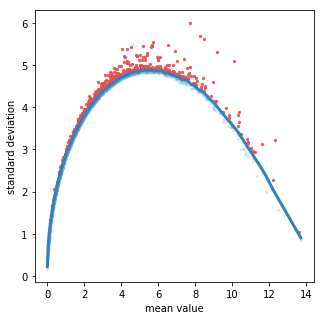

In [8]:
st.select_variable_genes(adata,loess_frac=0.01,n_genes=500)

In [9]:
st.dimension_reduction(adata,n_components=10,nb_pct=0.025)

44 cpus are being used ...


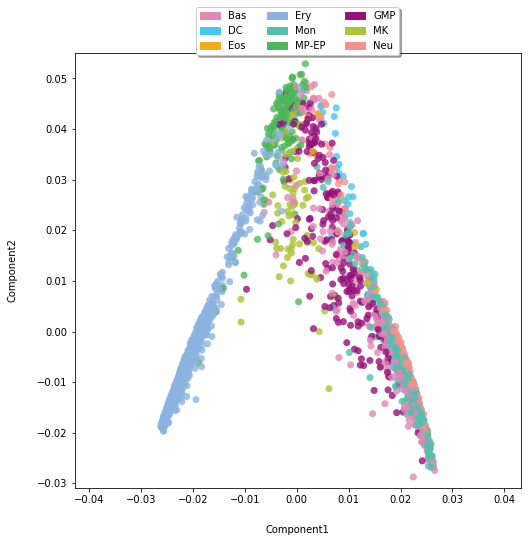

In [10]:
st.plot_dimension_reduction(adata,n_components=2)

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/huidong_py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


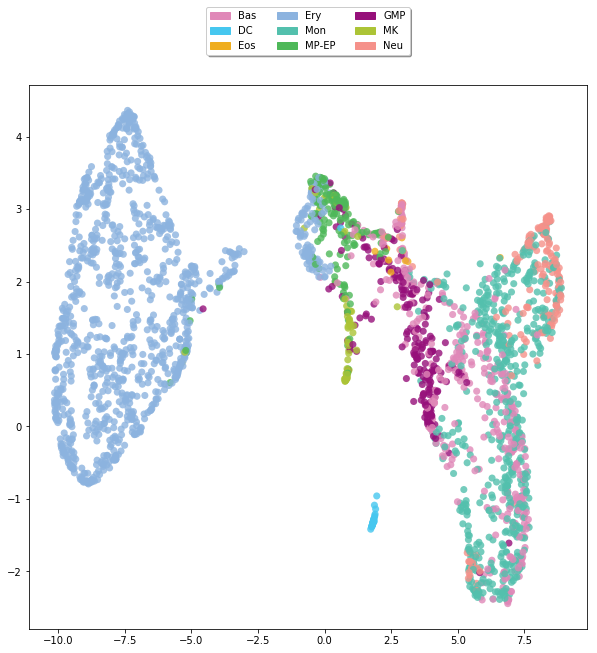

In [11]:
st.plot_visualization_2D(adata,use_precomputed=False)

#### switch to low dimensional space

In [12]:
adata_low = st.switch_to_low_dimension(adata,n_components=2)

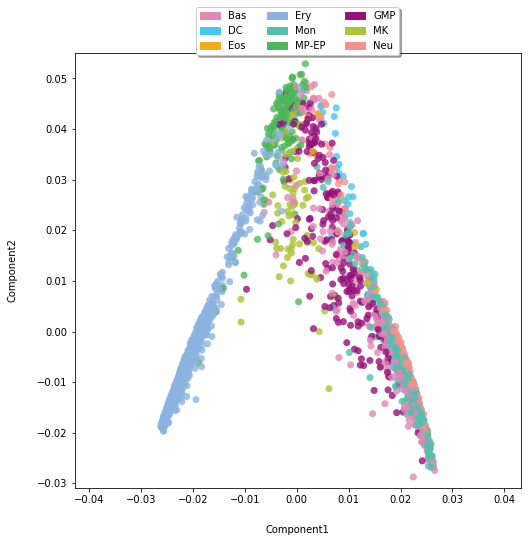

In [13]:
st.plot_dimension_reduction(adata_low,n_components=2)

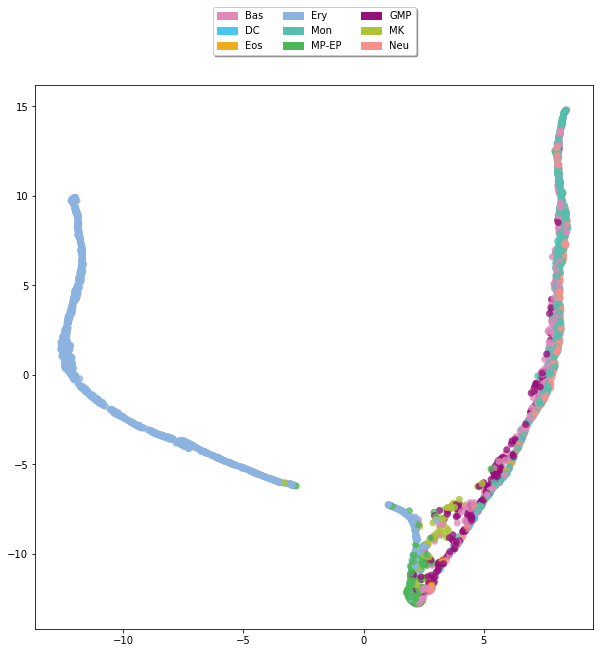

In [15]:
st.plot_visualization_2D(adata_low,use_precomputed=False)

In [16]:
st.seed_elastic_principal_graph(adata_low,damping=0.9)

Seeding initial elastic principal graph...
Clustering...
Affinity propagation ...
The number of initial nodes is 18
Calculatng minimum spanning tree...
Number of initial branches: 4


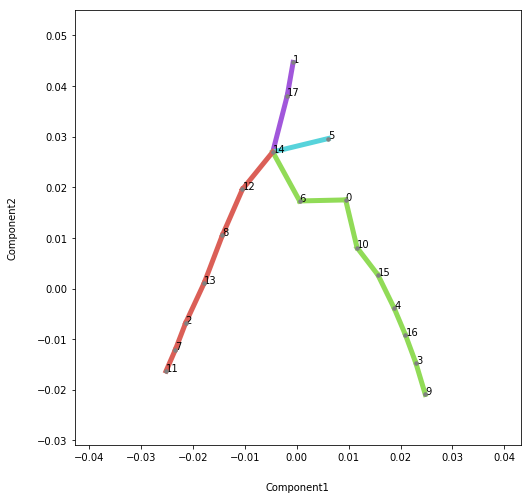

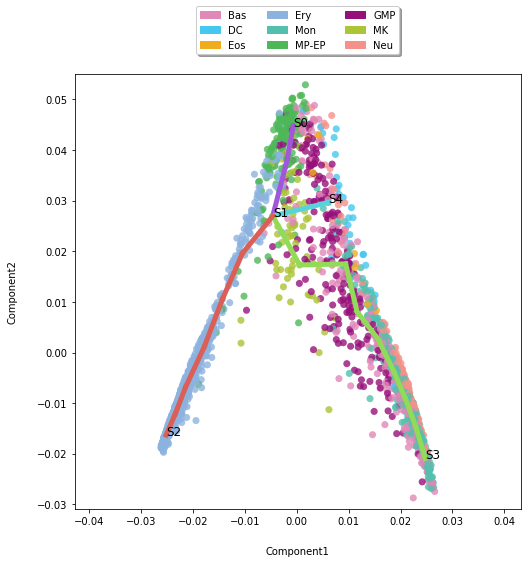

In [17]:
st.plot_branches(adata_low,n_components=2)
st.plot_branches_with_cells(adata_low,n_components=2)

In [18]:
st.elastic_principal_graph(adata_low)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 2699 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
1.225e-05
	
50
	
49
	
46
	
1
	
0
	
0
	
5.025e-06
	
4.528e-06
	
0.9932
	
0.9939
	
6.755e-06
	
4.661e-07
	
2.33e-05
	
0.001165
	
0


70.004 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


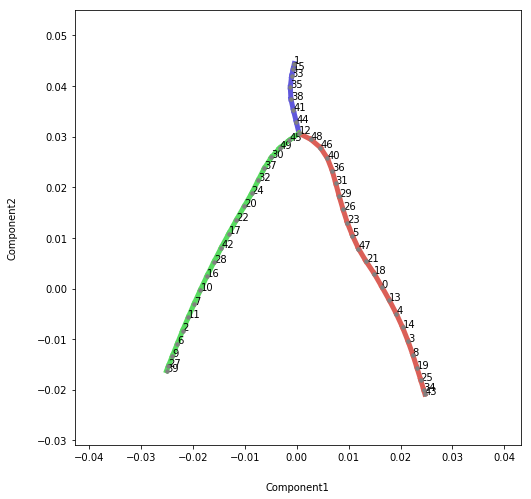

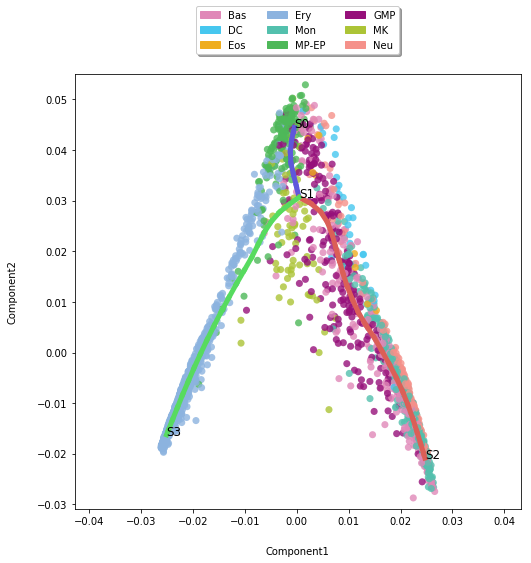

In [19]:
st.plot_branches(adata_low,n_components=2)
st.plot_branches_with_cells(adata_low,n_components=2)

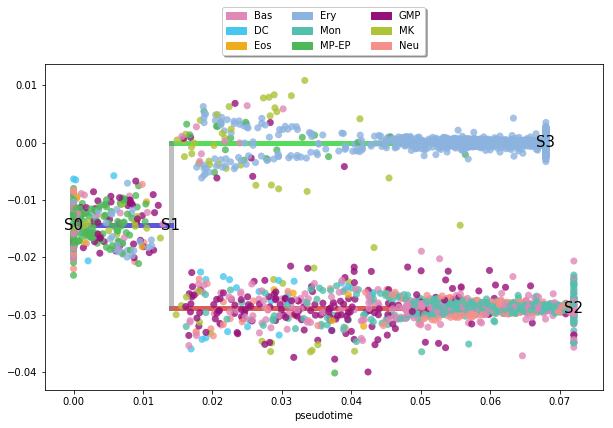

In [20]:
st.subwaymap_plot(adata_low,root='S0',percentile_dist=100)

#### switch back to high dimensional space

In [21]:
init_nodes_pos,init_edges = st.infer_initial_structure(adata_low)

node 12 is calculated using 5nearest neighbor cells


In [22]:
st.seed_elastic_principal_graph(adata,init_nodes_pos=init_nodes_pos,init_edges=init_edges)

Seeding initial elastic principal graph...
Setting initial nodes...
The number of initial nodes is 50
Setting initial edges...
Number of initial branches: 3


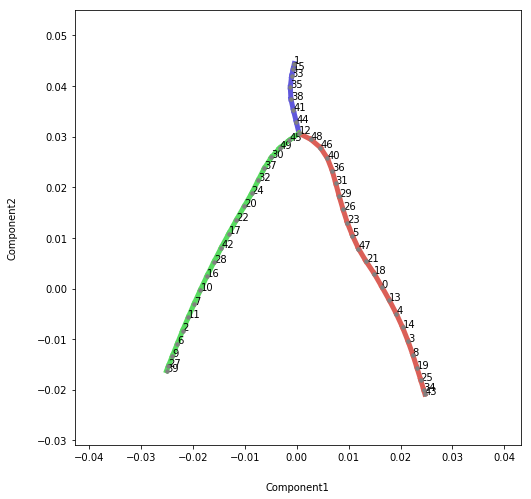

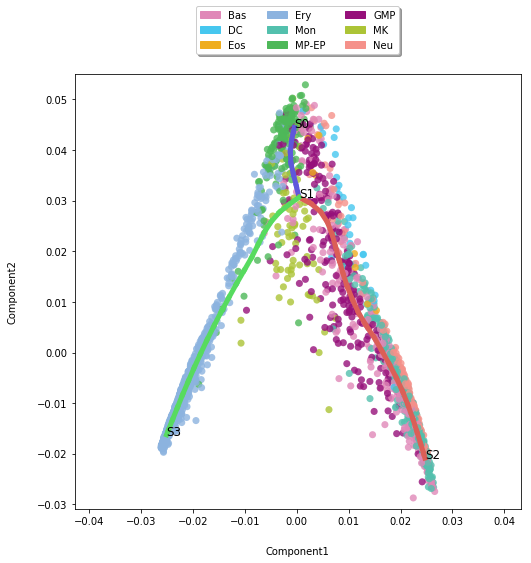

In [23]:
st.plot_branches(adata,n_components=2)
st.plot_branches_with_cells(adata,n_components=2)

Importing precomputed umap visualization ...


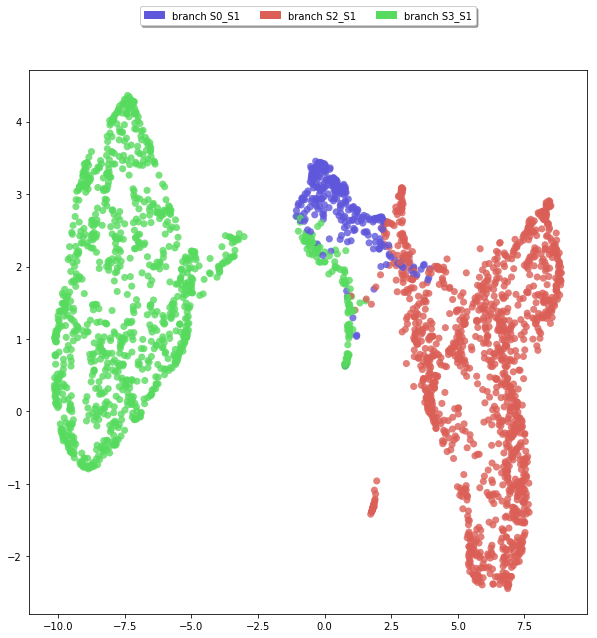

In [24]:
st.plot_visualization_2D(adata,color_by='branch')

In [25]:
st.elastic_principal_graph(adata,incr_n_nodes=10)

epg_n_nodes is too small. It is corrected to the initial number of nodes plus incr_n_nodes
Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 60 nodes on 2699 points and 10 dimensions"


[1]
 "Using a single core"


Nodes = 
50
 
51
 
52
 
53
 
54
 
55
 
56
 
57
 
58
 
59
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

5||60
	
0.0009832
	
60
	
59
	
48
	
5
	
0
	
0
	
0.0006517
	
0.0006385
	
0.8242
	
0.8277
	
0.0002844
	
4.704e-05
	
0.002822
	
0.1693
	
0


52.293 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 11


In [26]:
st.optimize_branching(adata)

Optimizing branching...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 90 nodes on 2699 points and 10 dimensions"


[1]
 "Using a single core"


Nodes = 
60
 
61
 
62
 
63
 
64
 
65
 
66
 
67
 
68
 
69
 
70
 
71
 
72
 
73
 
74
 
75
 
76
 
77
 
78
 
79
 
80
 
81
 
82
 
83
 
84
 
85
 
86
 
87
 
88
 
89
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

5||90
	
0.0007061
	
90
	
89
	
78
	
5
	
0
	
0
	
0.0004998
	
0.0004871
	
0.8652
	
0.8686
	
0.0001496
	
5.67e-05
	
0.005103
	
0.4593
	
0


26.485 sec elapsed

Number of branches after optimizing branching: 11


Extending leaves with additional nodes ...
Number of branches after extending leaves: 11


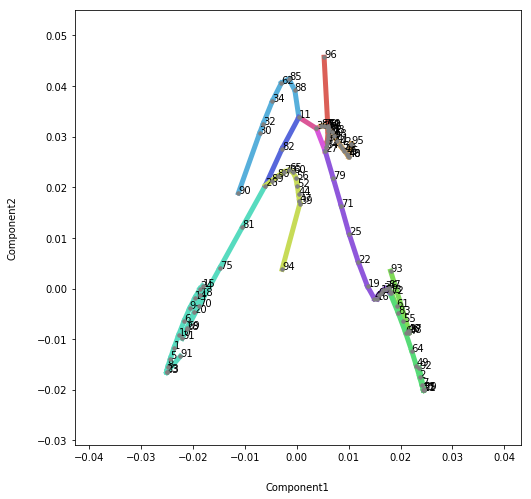

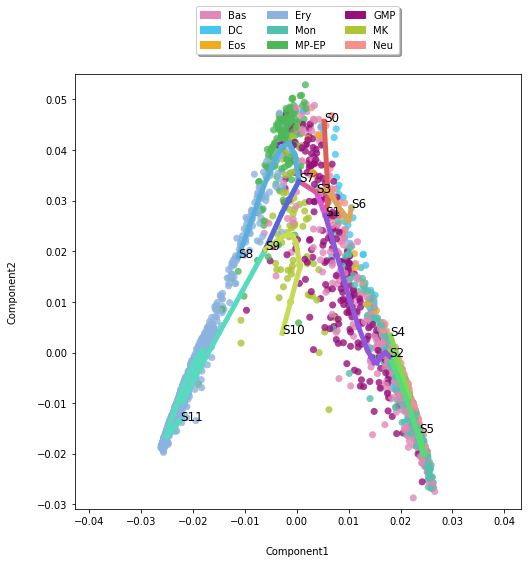

In [27]:
st.extend_elastic_principal_graph(adata)
st.plot_branches(adata,n_components=2)
st.plot_branches_with_cells(adata,n_components=2)

Importing precomputed umap visualization ...


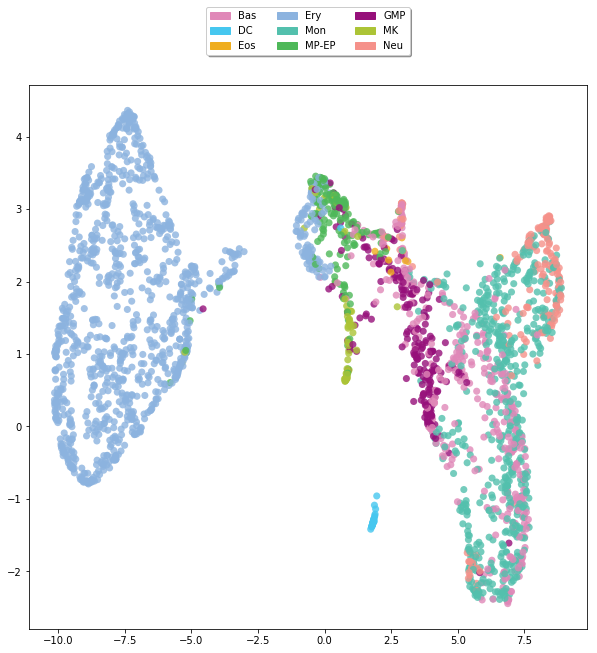

In [29]:
st.plot_visualization_2D(adata)

Importing precomputed umap visualization ...


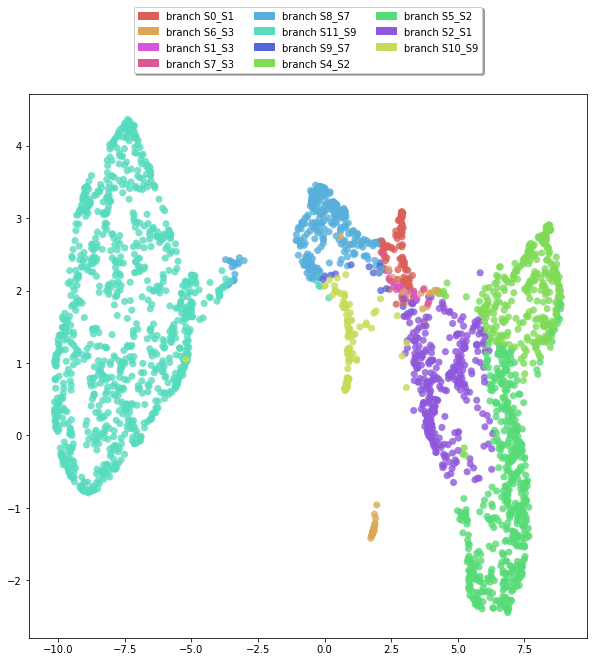

In [30]:
st.plot_visualization_2D(adata,color_by='branch')

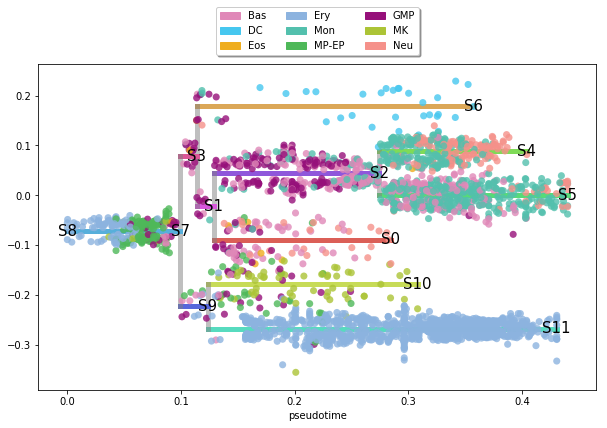

In [31]:
st.subwaymap_plot(adata,root='S8')

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/huidong_py36/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


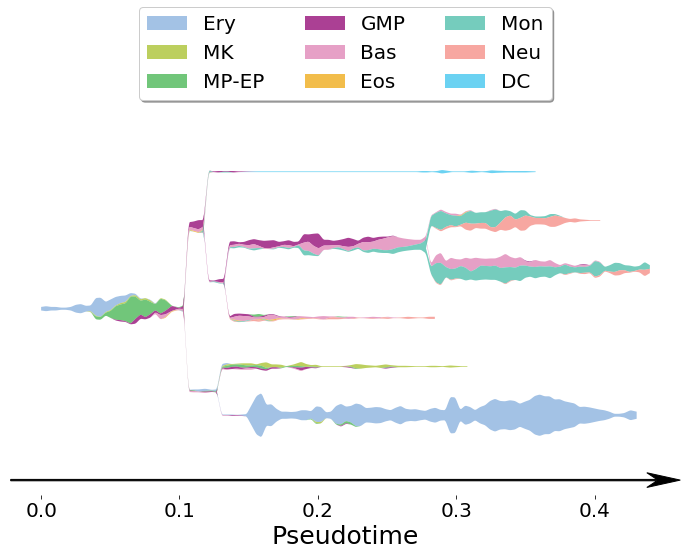

In [33]:
st.stream_plot(adata,root='S8')

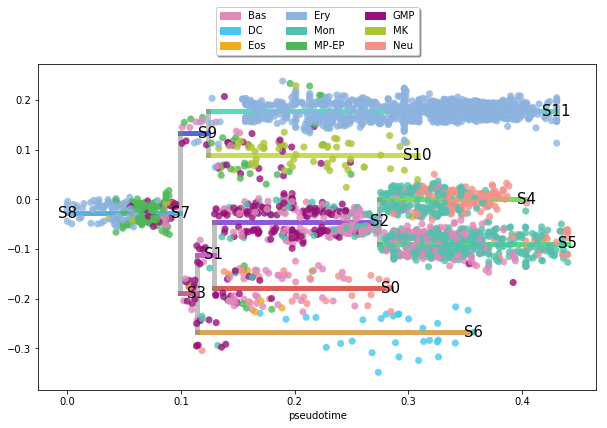

In [32]:
st.subwaymap_plot(adata,root='S8',preference=['S11','S10','S4',])

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/huidong_py36/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


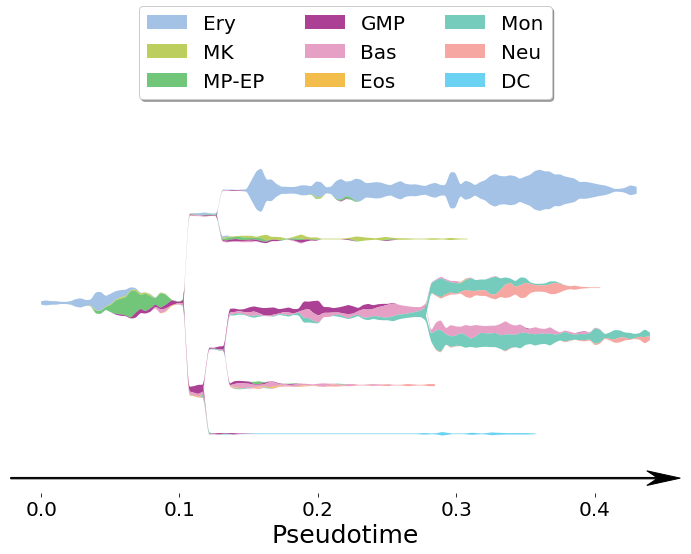

In [34]:
st.stream_plot(adata,root='S8',preference=['S11','S10','S4',])

/data/pinello/SHARED_SOFTWARE/anaconda3/envs/huidong_py36/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


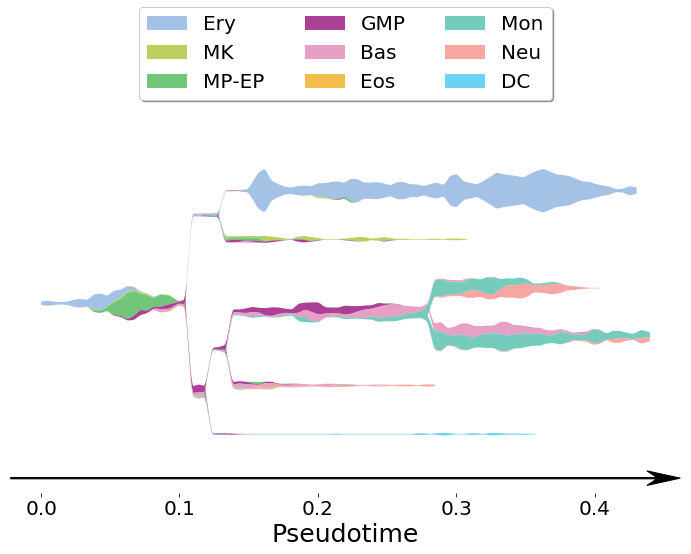

In [36]:
st.stream_plot(adata,root='S8',preference=['S11','S10','S4',],factor_min_win=1.5)

In [37]:
st.write(adata)
st.write(adata_low,file_name='stream_result_low.pkl')